# Part II - (Key insights behind student's Academic performance)
## by (Maureen Onovae)


## Investigation Overview


In this investigation, I looked at the effect of parental background (such degree,occupational status and income.) on academic performance of students. The main focus will be on how many features contribute to student performance in their academics. 


## Dataset Overview

The pisa2012 dataset contains over 400,000 responses from different students with more than 600 features. But for the purpose of this analysis and visualization, I will be using 200,000 samples of the dataset with 29 features. The features are of variety of format such as nominal, continuous, text, ordinal, discrete, etc.,

In [91]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")
plt.style.use('fivethirtyeight')

In [92]:
# load in the dataset into a pandas dataframe
pisa_df = pd.read_csv('process_data.csv')


## (Visualization 1)

### Show Student score distribution in different subject

In [93]:
def order_cat(columns: list, order: list =None):
    """Order all columns scale in the right order"""
    if not order:
        order = ['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree']
    for col in columns:
        pisa_df[col] = pd.Categorical(pisa_df[col], categories=order, ordered=True)

sch_lvl = ['She did not complete ','He did not complete ']
for col, lvl in zip(['mother_sch_lvl', 'father_sch_lvl'], sch_lvl):
    order_cat([col], order=[lvl,'ISCED level 1', 'ISCED level 2',
                                    'ISCED level 3A', 'ISCED level 3B, 3C'])

job_status = ['mother_job_status', 'father_job_status']

order_cat(job_status, order=['Not working, but looking for a job', 
                            'Other (e.g. home duties, retired)', 'Working part-time ', 
                            'Working full-time '])
order_cat(['pri_sch'], 
            order=['No', 'Yes, for one year or less', 'Yes, for more than one year'])

possession = pisa_df.columns[pisa_df.columns.str.startswith('possess')]
order_cat(possession, order=['No', 'Yes'])

math_related = pisa_df.columns[pisa_df.columns.str.startswith('math')]



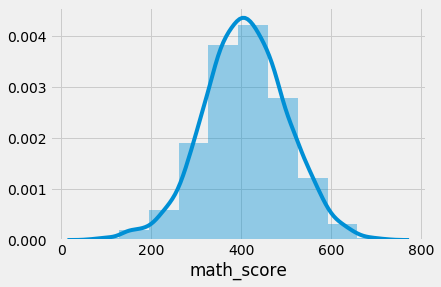

In [101]:
sb.distplot(pisa_df['math_score'], bins=10);


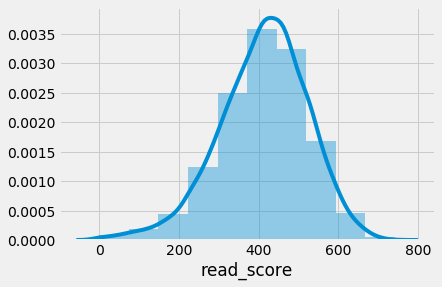

In [122]:
sb.distplot(pisa_df['read_score'], bins=10);

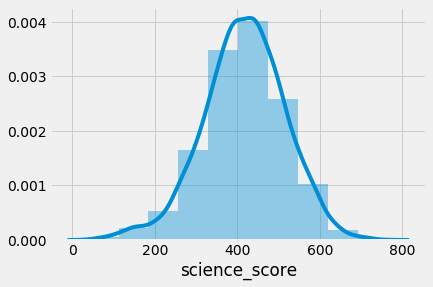

In [150]:
sb.distplot(pisa_df['science_score'], bins=10);

## (Visualization 2)

### Effect of Early education  on performance

This study has contributed to the confirmation that children perform better academically when they begin their schooling at an early age.

In [144]:
def age_influence_plot(score, p='Greens_r'):
    fig, ax = plt.subplots(figsize=(15, 6))
    sb.boxplot(data=pisa_df, x='age_at_pri_sch', y=score, palette=p, ax=ax)
    plt.xlabel('Age at Primary School')
    plt.ylabel(score.replace('_', " ").title())
    plt.title("Effect of Early education  on performance")

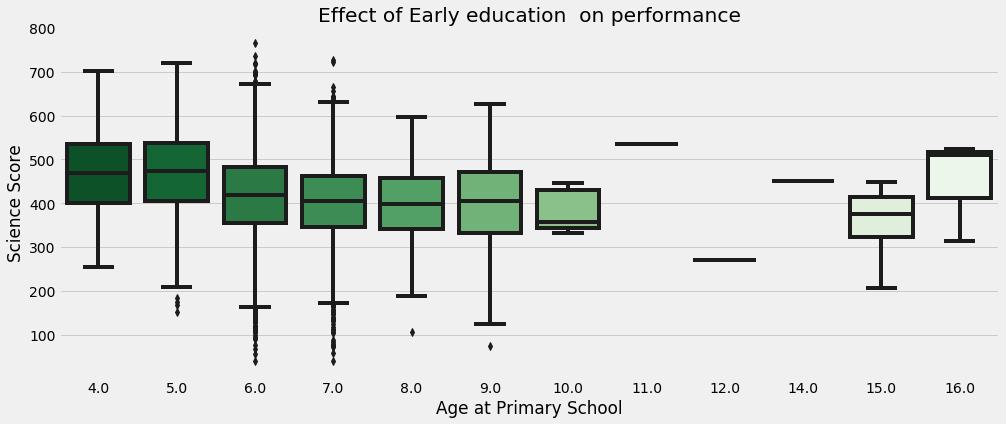

In [146]:
age_influence_plot('science_score')

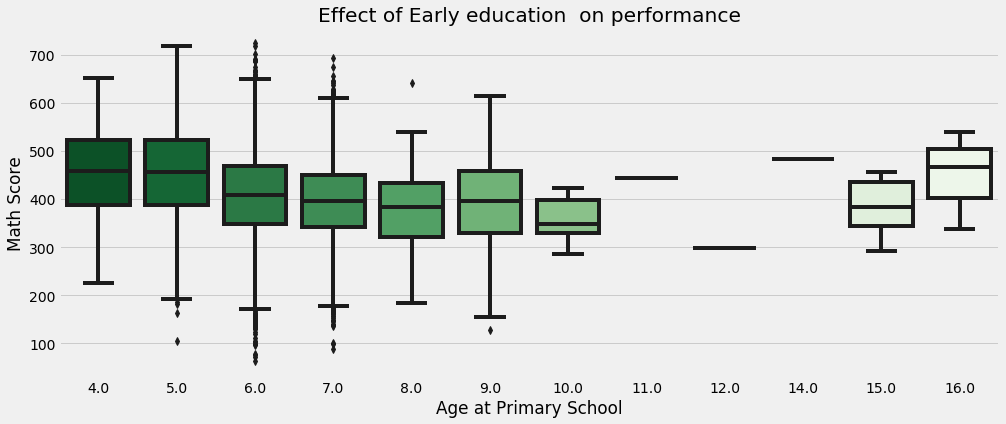

In [145]:


age_influence_plot('math_score')


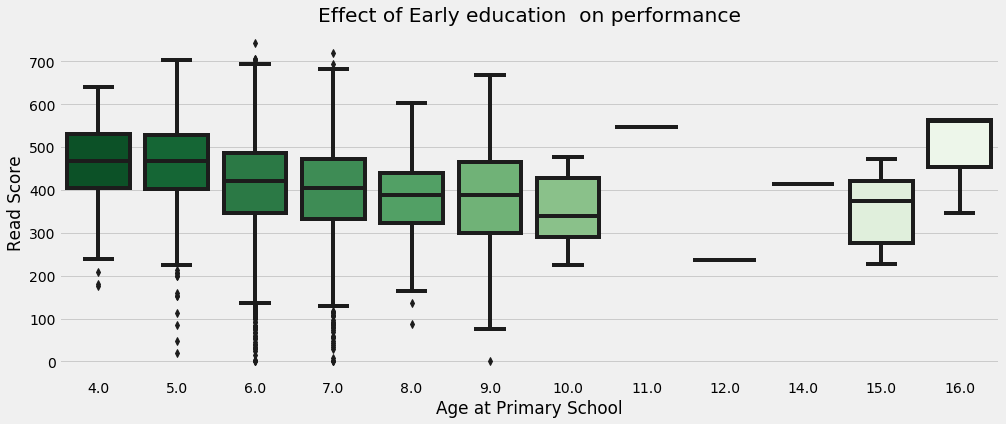

In [147]:
age_influence_plot('read_score')

## (Visualization 3)



###  Effect of Parent Earning on Student's Academic Performance

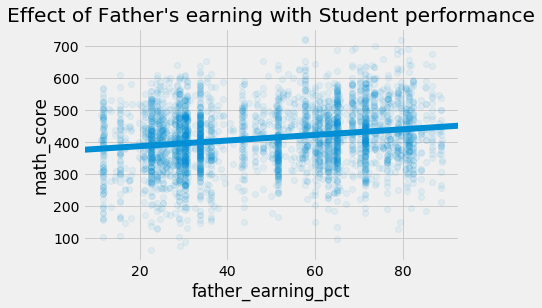

In [153]:
sb.regplot(data=pisa_df.sample(5000), x='father_earning_pct', y='math_score', scatter_kws={'alpha': 0.07})
plt.title("Effect of Father's earning with Student performance");

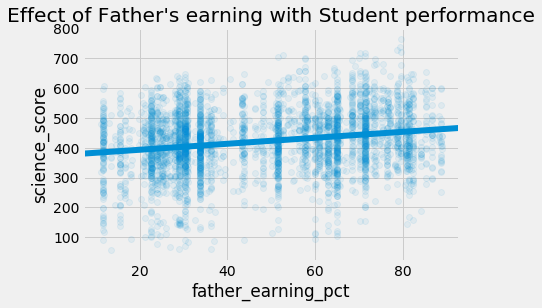

In [155]:
sb.regplot(data=pisa_df.sample(5000), x='father_earning_pct', y='science_score', scatter_kws={'alpha': 0.07})
plt.title("Effect of Father's earning with Student performance");

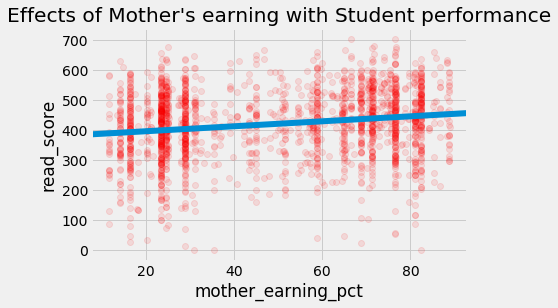

In [154]:
sb.regplot(data=pisa_df.sample(5000), x='mother_earning_pct', y='read_score', scatter_kws={'alpha': 0.1, 'color': 'r'})
plt.title("Effects of Mother's earning with Student performance");


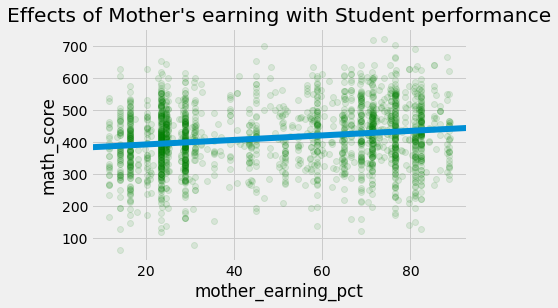

In [157]:
sb.regplot(data=pisa_df.sample(5000), x='mother_earning_pct', y='math_score', scatter_kws={'alpha': 0.1, 'color': 'g'})
plt.title("Effects of Mother's earning with Student performance");

The visuals shows a slight upward trend between parent earnings and the student's academic performance.

### Conclusions



When a student's basic school foundation is strong, their performance will always be exceptional. This study has contributed to the confirmation that children perform better academically if the begin schooling early. Also oweing to the fact that most of the values that will contribute to knowledge demand money and exposure, parent education and occupation has a significant impact on their children's academic performance.Another fact could also be that literate parents will approach schooling very differently than uneducated parents. Most students who have access to some facilities like; a reading room, books, computer to conduct research on, and the internet for research usually do well in school and achieve higher grades in their exams due to this exposures. Notwithstanding there is a general knowledge that every student have thier individual strength which could be enhanced by some of there parameters as highlighted in this project.

 Overall, parents' involvement in their children's education has a significant impact on how well they succeed.

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:

# The command below will generate the HTML slideshow. 
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt